# Telco Churn Report

## Project Goal

- Identify Key Churn Drivers: Determine the primary factors influencing customer churn at Telco by conducting a thorough analysis of customer data.
- Develop Predictive Models: Build accurate machine learning models that predict customer churn based on historical data.
- Provide Actionable Insights: Translate complex data analysis into actionable insights and recommendations for Telco.
- Long-Term Churn Prevention: Extend the project's impact beyond immediate insights by creating a roadmap for ongoing churn prevention.

In [30]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from env import get_connection
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from prepare import encode_categorical_columns, train_val_test, theometrics
from wrangle import get_telco_data, clean_telco_columns, train_val_test, perform_chi_squared_test, perform_t_test

## Acquire

- Acquiring specific columns that i need for the project from the telco_churn dataset using sql.
- Read the sql query into a dataframe.
- It contained 7_043 rows and 24 columns before cleaning

## Prepare data

* Create new columns by transforming and utilizing existing data features.
    - Drop the customer_id column
    - Check all rows in the df with no/null values and replacing them with an appropriate value.
    - Group different values in the columns and make them categorical if needed.
    - One-hot encode categorical culomns with get dummies.
    - Drop all the encoded columns that are not useful.

## Data Dictionary

| Feature                | Definition | Data Type |
|:-----------------------|:-----------|:----------|
| gender                 | Gender of the customer | Object |
| senior_citizen         | 0 if not a senior citizen, 1 if a senior citizen | Integer |
| partner                | Whether the customer has a partner (Yes/No) | Object |
| dependents             | Whether the customer has dependents (Yes/No) | Object |
| tenure                 | Number of months the customer has been with the company | Integer |
| phone_service          | Whether the customer has phone service (Yes/No) | Object |
| multiple_lines         | Whether the customer has multiple lines (Yes/No) | Object |
| online_security        | Whether the customer has online security (Yes/No) | Object |
| online_backup          | Whether the customer has online backup (Yes/No) | Object |
| device_protection      | Whether the customer has device protection (Yes/No) | Object |
| tech_support           | Whether the customer has tech support (Yes/No) | Object |
| streaming_tv           | Whether the customer has streaming TV (Yes/No) | Object |
| streaming_movies       | Whether the customer has streaming movies (Yes/No) | Object |
| paperless_billing      | Whether the customer has paperless billing (Yes/No) | Object |
| monthly_charges        | Monthly charges for the customer | Float |
| total_charges          | Total charges incurred by the customer | Object |
| churn                  | Whether the customer has churned (Yes/No) | Object |
| payment_type           | Method of payment for the service | Object |
| contract_type          | Type of contract (e.g., Month-to-Month, One/Two Years) | Object |
| internet_service_type  | Type of internet service (e.g., DSL, Fiber optic) | Object |


In [31]:
# acquiring, cleaning, and adding features to data
telco_df = get_telco_data()

# splitting data into train, validate, and test
train, val, test = train_val_test(telco_df, strat = 'churn')

### A quick overview of the data

In [32]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
5609,7901-HXJVA,Male,0,No,No,14,Yes,No,No,No,...,No,No,No,No,76.45,1117.55,False,Manual Payment,Month-to-month,Fiber optic
2209,3164-AALRN,Male,0,No,No,5,Yes,No,No,No,...,No,Yes,Yes,Yes,70.00,347.4,True,Manual Payment,one/two-years,DSL
6919,9821-POOTN,Male,0,Yes,No,35,Yes,Yes,No,No,...,No,No,No,Yes,75.20,2576.2,True,Manual Payment,Month-to-month,Fiber optic
2284,3259-QMXUN,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,...,No,Yes,Yes,Yes,86.10,4890.5,False,Manual Payment,one/two-years,DSL
845,1226-UDFZR,Female,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,49.60,114.7,True,Manual Payment,Month-to-month,DSL


### A concise summary of the data

In [33]:
train.contract_type.value_counts()

contract_type
Month-to-month    2693
one/two-years     2237
Name: count, dtype: int64

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 5609 to 5679
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4930 non-null   object 
 1   gender                 4930 non-null   object 
 2   senior_citizen         4930 non-null   int64  
 3   partner                4930 non-null   object 
 4   dependents             4930 non-null   object 
 5   tenure                 4930 non-null   int64  
 6   phone_service          4930 non-null   object 
 7   multiple_lines         4930 non-null   object 
 8   online_security        4930 non-null   object 
 9   online_backup          4930 non-null   object 
 10  device_protection      4930 non-null   object 
 11  tech_support           4930 non-null   object 
 12  streaming_tv           4930 non-null   object 
 13  streaming_movies       4930 non-null   object 
 14  paperless_billing      4930 non-null   object 
 15  monthl

## Explore

## Chi^2 test

#### Does having tech support affects churn?

Null hypothesis: Having tech support DOES NOT affect churn.

Alternative hypothesis: Having tech support AFFECTS churn.

In [35]:
#using the perform_chi_squared_test function to find the value of p

perform_chi_squared_test(train, 'churn', 'tech_support', alpha = 0.05)

('we reject the null hypothesis. There appears to be a relationship',
 4.700462998703674e-128)

#### Takeaway

- The chi^2 test produced a p value of (4.700462998703674e-128) which is significantly lower than our cutoff of 0.05 indicating that there is a strong correlation between having tech support and churn.,

#### Creating a countplot to visualize the relationship between tech support and churn

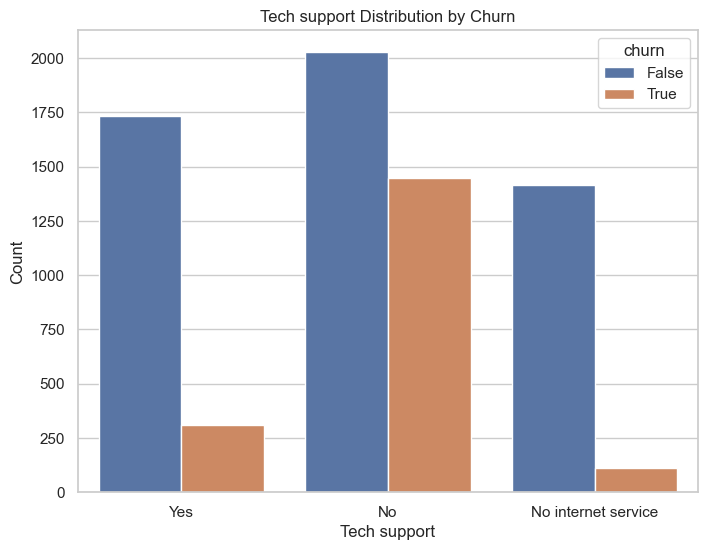

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_df, x='tech_support', hue='churn')
plt.title("Tech support Distribution by Churn")
plt.xlabel("Tech support")
plt.ylabel("Count")
plt.show()

#### takeaway from countplot

- We can observe that the presence of tech support does impact churn, as nearly half of customers without tech support have churned, in contrast to the fewer than 15% of customers with tech support who have churned.

## Independent t-test

#### Does tenure have a direct relationship with churn?


Null hypothesis: Tenure DOES NOT have a direct relationship with churn.

Alternative hypothesis: Tenure has a direct relationship with churn.

In [38]:
perform_t_test(train, 'tenure')

('Reject the null hypothesis: tenure has a significant effect on churn.',
 1.6523707947511127e-170)

#### Takeaway

The independent t-test produced a p value of (1.6523707947511127e-170) which is significantly lower than our cutoff of 0.05 indicating that there is a direct relationship between tenure and the churn.

#### Creating a boxplot to visualize the relationship between tenure and churn

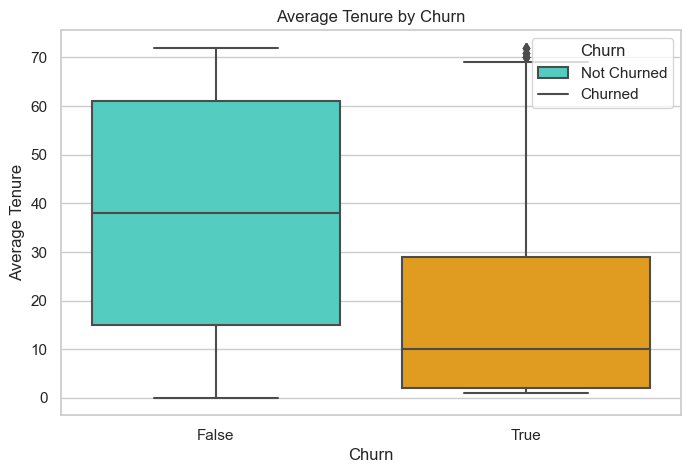

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x='churn', y='tenure',palette={False: 'turquoise', True: 'orange'})
plt.title('Average Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.legend(title='Churn', labels=["Not Churned", "Churned"])
plt.show()

#### takeaway from boxplot

The above bar plot shows the average tenure for both churn groups and we can discern that the longer the customer is with the company the less likely it is for them to churn.

## Chi^2 test

#### Does the contract type affect churn?

Null hypothesis : Contract type has NO relation to churn.

Alternative hypothesis : Contract type HAS a relation to churn.

In [40]:
perform_chi_squared_test(train, 'churn', 'contract_type')

('we reject the null hypothesis. There appears to be a relationship',
 1.8766652889790652e-184)

### Takeaway

- - The chi^2 test produced a p value of ( 1.8766652889790652e-184) which is significantly lower than our cutoff of 0.05 indicating that there is a strong correlation between contract type and churn.

#### Creating a countplot to visualize the relationship between contract type and churn

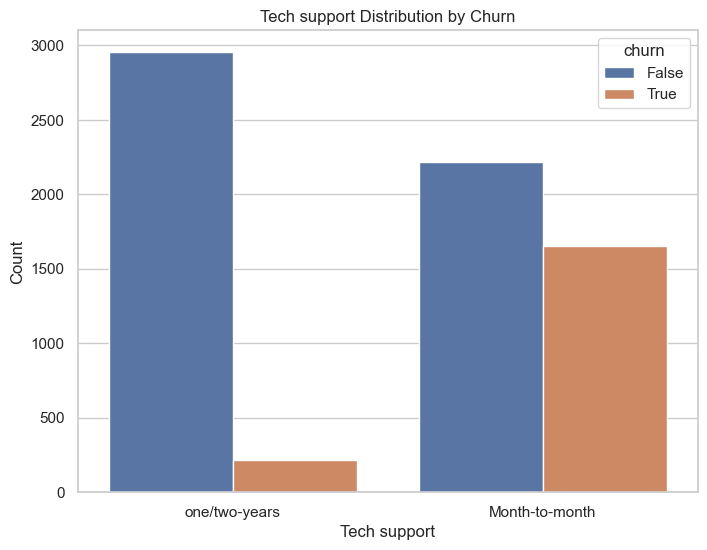

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_df, x='contract_type', hue='churn')
plt.title("Tech support Distribution by Churn")
plt.xlabel("Tech support")
plt.ylabel("Count")
plt.show()

#### Takeaway from boxplot

- We can observe that the presence of tech support does impact churn, as nearly half of customers without tech support have churned, in contrast to the fewer than 15% of customers with tech support who have churned.

- We can discern from the box plot that having a month to month contract significantly increases the probability of the customer churning.

#### Does internet service type have a strong relationship with churn?

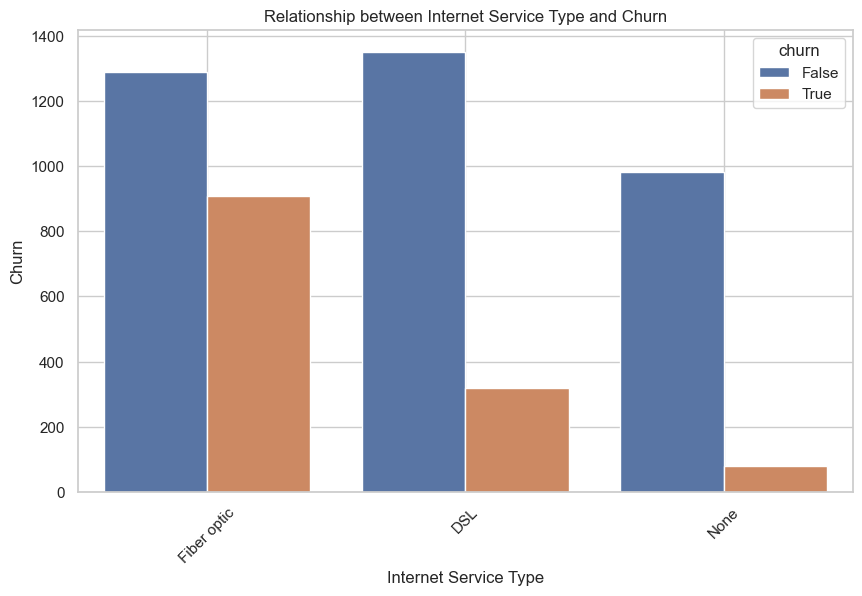

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data = train, x = 'internet_service_type', hue = 'churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn')
plt.title('Relationship between Internet Service Type and Churn')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 
Does internet service type have a strong relationship with churn?  
Does being a senior citizen affect churn   